In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Category: daisy


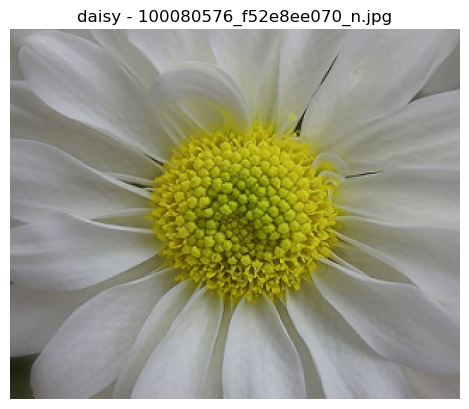

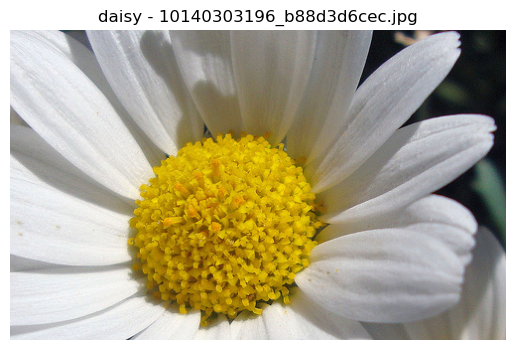

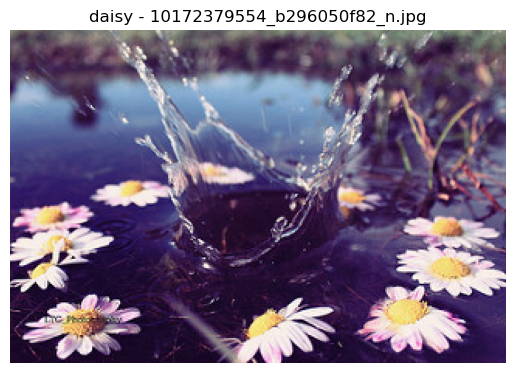

Category: dandelion


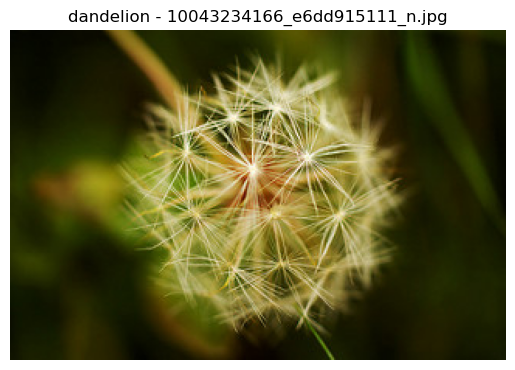

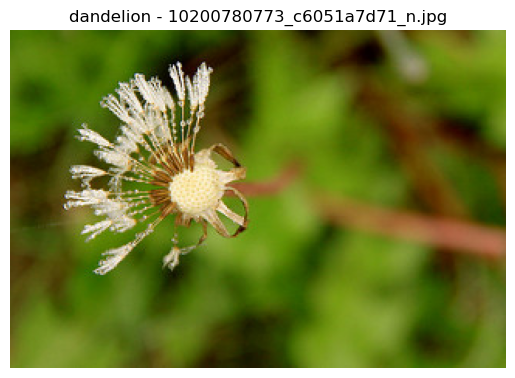

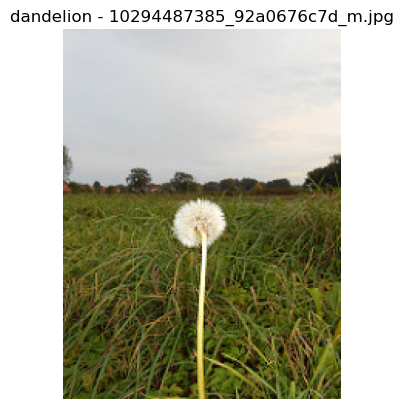

Category: roses


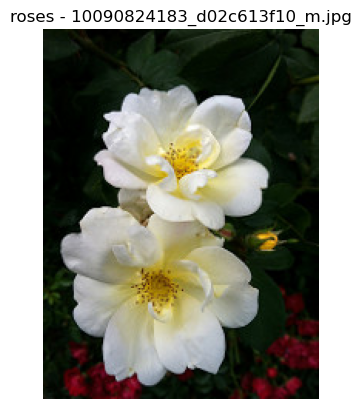

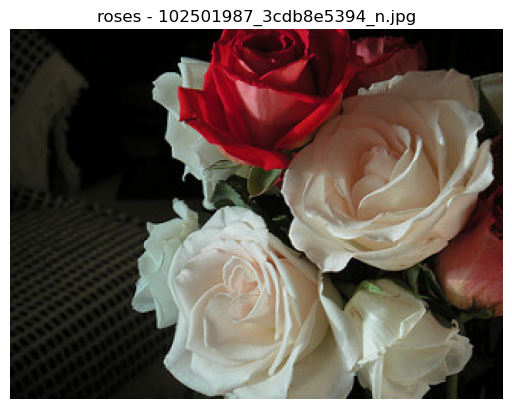

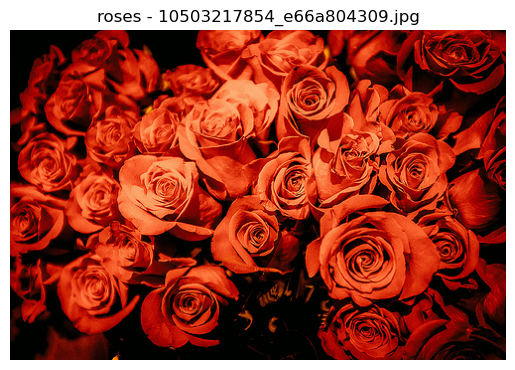

Category: sunflowers


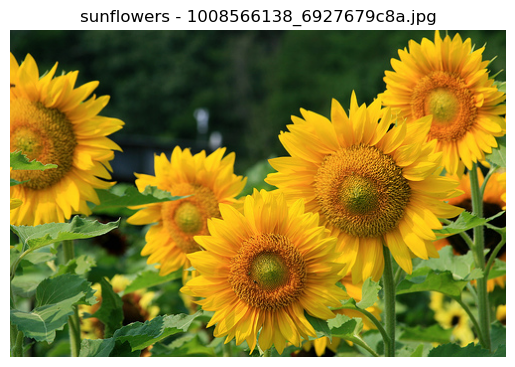

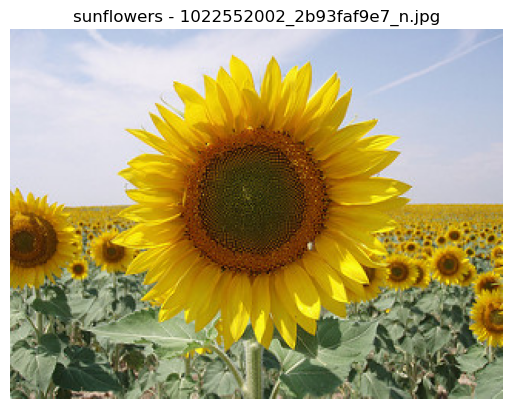

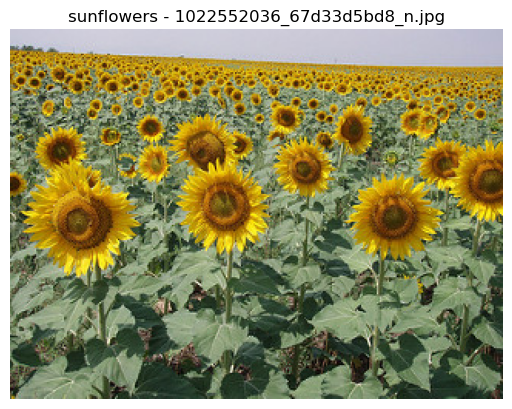

Category: tulips


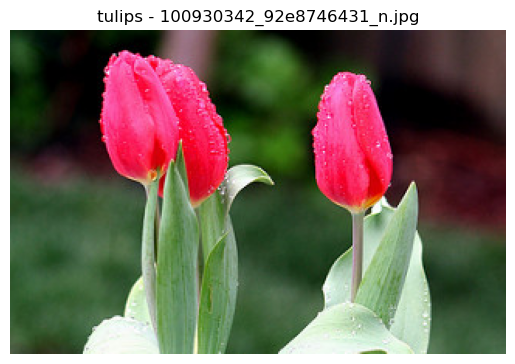

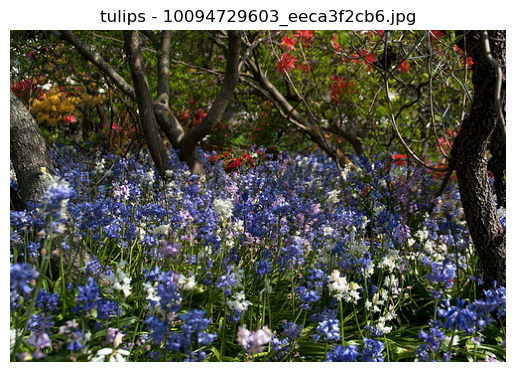

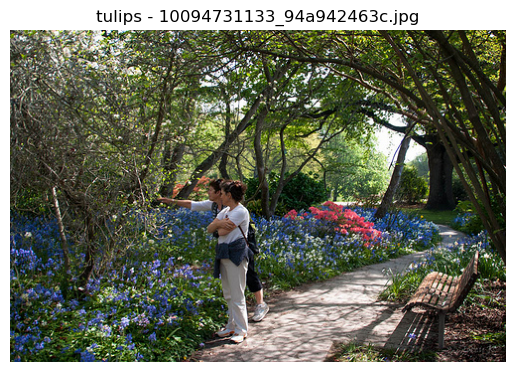

In [2]:
dataset_dir = 'flower_datasets/flower_photos/'

categories = os.listdir(dataset_dir)

# Display images from each category
num_images_per_category = 3
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        print(f"Category: {category}")
        image_files = [f for f in os.listdir(category_dir) if f.endswith('.jpg')]
        for i in range(num_images_per_category):
            img_path = os.path.join(category_dir, image_files[i])
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"{category} - {image_files[i]}")
            plt.axis('off')
            plt.show()

In [3]:
X = []
y = []
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        image_files = [f for f in os.listdir(category_dir) if f.endswith('.jpg')]
        for img_file in image_files:
            img_path = os.path.join(category_dir, img_file)
            img = Image.open(img_path).resize((128, 128))  # Resize images to a consistent size
            img_array = np.array(img).flatten()  # Convert image to a 1D array
            X.append(img_array)
            y.append(1 if category == 'daisy' else 0)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [4]:
X.shape

(3670, 49152)

In [5]:
y


array([1, 1, 1, ..., 0, 0, 0])

In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# def get_score(model,X_train, X_test, y_train, y_test):
#     model.fit(X_train,y_train)
#     return model.score(X_test,y_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=4,random_state=101, shuffle=True)

In [9]:
#folds.get_n_splits(X,y)

In [10]:
#folds.split(X,y)

In [11]:
#Tried using direct module(cross_val_score) to find the accuracy of RandomForest module 
# from sklearn.model_selection import cross_val_score
# scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),X, y, cv=10)
# np.average(scores1)

In [12]:
# scores1

In [13]:
from sklearn.metrics import accuracy_score
accuracy=[]
model_11 = LogisticRegression() 

for train_index, test_index in folds.split(X,y):
    print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X[train_index],X[test_index]
    y1_train,y1_test=y[train_index],y[test_index]
    
                       
    model_11.fit(X1_train, y1_train)
    prediction=model_11.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
                            
print(accuracy)
   

Train [   0    1    2 ... 3666 3667 3669] Validation [   6    8    9   11   16   17   23   28   29   32   36   37   44   46
   48   50   53   57   59   60   62   67   75   79   85   90   91   96
   99  105  110  111  112  115  117  118  127  144  151  153  155  163
  165  167  169  174  177  179  180  191  195  202  206  207  213  217
  225  226  229  239  251  252  255  262  265  269  273  274  277  281
  287  288  289  291  295  298  305  310  312  316  317  318  322  329
  336  346  349  350  352  353  358  363  365  369  373  375  382  387
  394  411  415  419  421  422  423  424  429  430  437  440  449  457
  464  465  467  470  472  473  478  479  481  483  486  490  491  495
  498  501  506  507  510  511  512  513  514  525  528  533  539  541
  544  551  554  562  568  573  575  580  588  602  608  610  615  617
  619  620  622  623  628  634  637  642  644  646  649  650  652  653
  657  678  681  682  683  686  687  690  691  695  699  708  709  711
  713  718  723  724  72

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train [   0    2    3 ... 3667 3668 3669] Validation [   1    5   14   15   19   21   24   25   27   35   49   52   55   58
   71   77   84   87   88   97  102  104  113  114  119  123  124  126
  128  131  137  138  143  149  150  154  156  157  158  160  176  182
  187  192  193  194  198  200  201  204  205  208  212  214  216  218
  224  228  232  238  242  245  247  248  249  250  254  259  261  264
  266  267  271  272  279  284  294  296  299  301  302  303  304  307
  308  309  311  313  328  332  334  335  338  342  343  351  354  362
  367  372  374  376  379  391  392  398  401  404  409  413  414  416
  417  420  432  439  441  445  451  452  453  474  477  480  487  493
  504  505  509  515  518  519  522  524  529  530  535  536  547  548
  549  553  555  556  558  560  574  578  586  587  591  597  601  604
  605  611  612  624  633  635  636  639  640  641  645  648  654  656
  659  661  669  673  674  680  693  694  700  705  707  717  719  720
  725  729  730  731  73

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train [   0    1    4 ... 3667 3668 3669] Validation [   2    3    7   12   13   20   26   30   31   34   40   42   47   51
   54   56   68   69   72   74   80   81   82   83   86   94   98  108
  109  116  120  122  125  129  132  134  136  139  140  142  145  146
  147  148  152  159  161  162  164  166  171  172  173  185  188  189
  196  197  199  203  210  215  220  223  227  230  231  235  237  240
  241  243  253  256  260  275  280  282  283  285  286  290  323  326
  327  331  333  339  347  348  356  360  366  368  378  381  383  384
  385  389  396  402  403  407  427  433  434  436  442  444  446  447
  448  450  455  459  461  463  466  468  471  475  484  496  497  502
  503  517  520  521  523  527  532  534  538  542  545  546  550  552
  561  566  572  577  582  585  589  592  594  596  598  599  606  609
  614  616  627  631  638  643  660  662  663  667  670  671  679  684
  688  696  698  701  702  703  704  706  710  715  716  721  722  734
  735  749  751  753  75

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train [   1    2    3 ... 3664 3665 3668] Validation [   0    4   10   18   22   33   38   39   41   43   45   61   63   64
   65   66   70   73   76   78   89   92   93   95  100  101  103  106
  107  121  130  133  135  141  168  170  175  178  181  183  184  186
  190  209  211  219  221  222  233  234  236  244  246  257  258  263
  268  270  276  278  292  293  297  300  306  314  315  319  320  321
  324  325  330  337  340  341  344  345  355  357  359  361  364  370
  371  377  380  386  388  390  393  395  397  399  400  405  406  408
  410  412  418  425  426  428  431  435  438  443  454  456  458  460
  462  469  476  482  485  488  489  492  494  499  500  508  516  526
  531  537  540  543  557  559  563  564  565  567  569  570  571  576
  579  581  583  584  590  593  595  600  603  607  613  618  621  625
  626  629  630  632  647  651  655  658  664  665  666  668  672  675
  676  677  685  689  692  697  712  714  726  738  739  740  743  744
  746  747  757  761  76

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
np.array(accuracy).mean()

0.765664832514855

In [ ]:
accuracy=[]
model_11 = SVC() 

for train_index, test_index in folds.split(X,y):
    print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X[train_index],X[test_index]
    y1_train,y1_test=y[train_index],y[test_index]
    
                       
    model_11.fit(X1_train, y1_train)
    prediction=model_11.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
                            
print(accuracy)
   

Train [   0    1    2 ... 3666 3667 3669] Validation [   6    8    9   11   16   17   23   28   29   32   36   37   44   46
   48   50   53   57   59   60   62   67   75   79   85   90   91   96
   99  105  110  111  112  115  117  118  127  144  151  153  155  163
  165  167  169  174  177  179  180  191  195  202  206  207  213  217
  225  226  229  239  251  252  255  262  265  269  273  274  277  281
  287  288  289  291  295  298  305  310  312  316  317  318  322  329
  336  346  349  350  352  353  358  363  365  369  373  375  382  387
  394  411  415  419  421  422  423  424  429  430  437  440  449  457
  464  465  467  470  472  473  478  479  481  483  486  490  491  495
  498  501  506  507  510  511  512  513  514  525  528  533  539  541
  544  551  554  562  568  573  575  580  588  602  608  610  615  617
  619  620  622  623  628  634  637  642  644  646  649  650  652  653
  657  678  681  682  683  686  687  690  691  695  699  708  709  711
  713  718  723  724  72

In [ ]:
np.array(accuracy).mean()

In [ ]:
model_11 = RandomForestClassifier() 

for train_index, test_index in folds.split(X,y):
    print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X[train_index],X[test_index]
    y1_train,y1_test=y[train_index],y[test_index]
    
                       
    model_11.fit(X1_train, y1_train)
    prediction=model_11.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
                            
print(accuracy)
   

In [ ]:
np.array(accuracy).mean()
